### RealPython: Fourier Transforms with scipy.fft

* https://realpython.com/python-scipy-fft/#making-it-faster-with-rfft

220500
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 4.99993197e+00
 4.99995465e+00 4.99997732e+00]


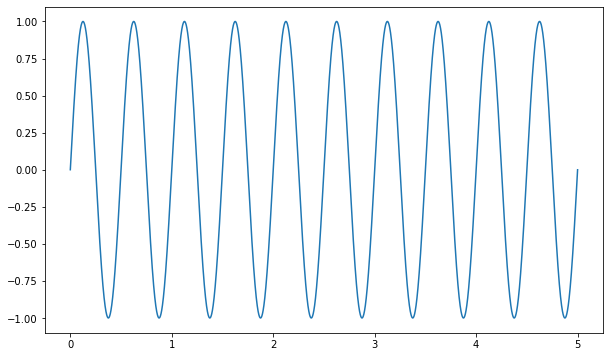

In [110]:
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    print(len(x))
    print(x)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.show()

In [111]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

220500
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 4.99993197e+00
 4.99995465e+00 4.99997732e+00]
220500
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 4.99993197e+00
 4.99995465e+00 4.99997732e+00]


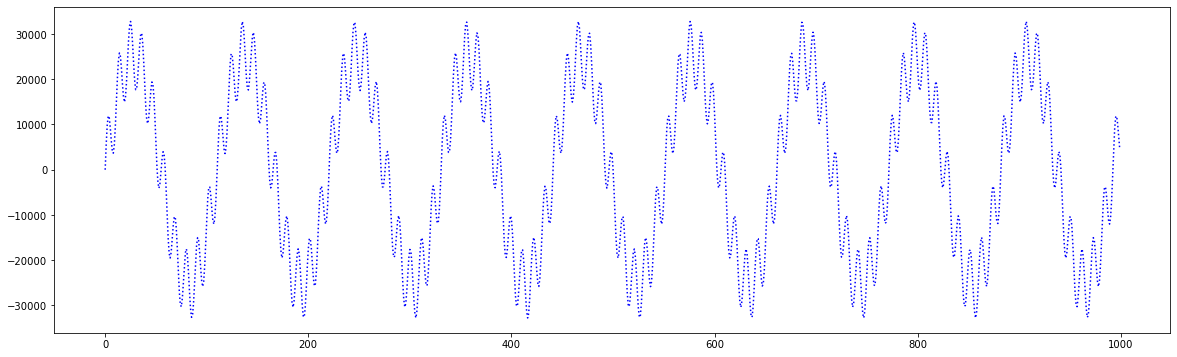

In [116]:
plt.figure(figsize=(20,6))

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
normalized_tone2 = np.int16(mixed_tone * 32767)

#plt.plot(normalized_tone[:1000], color='red')
plt.plot(normalized_tone[:1000], 'b:')
plt.show()

In [108]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

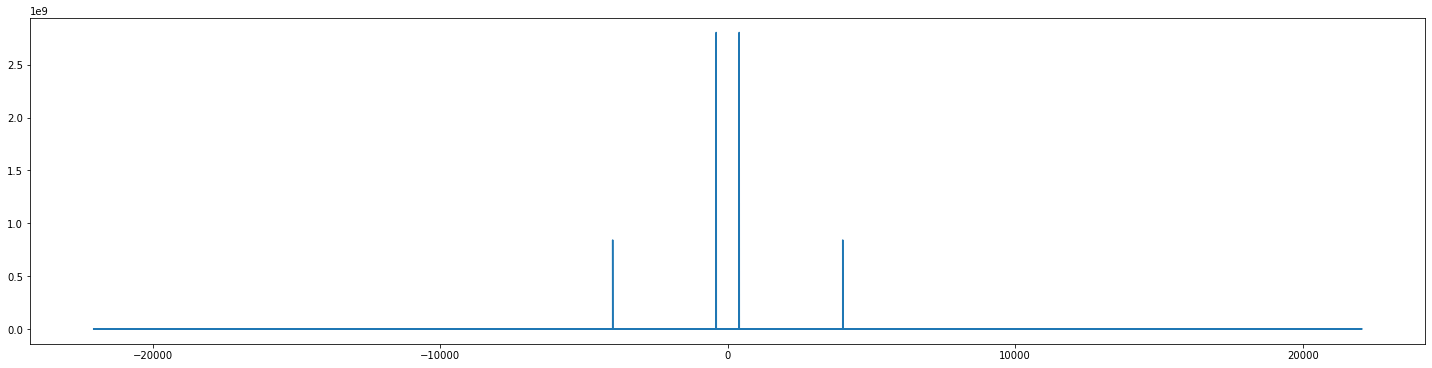

In [117]:
# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(25,6))
plt.plot(xf, np.abs(yf))
plt.show()

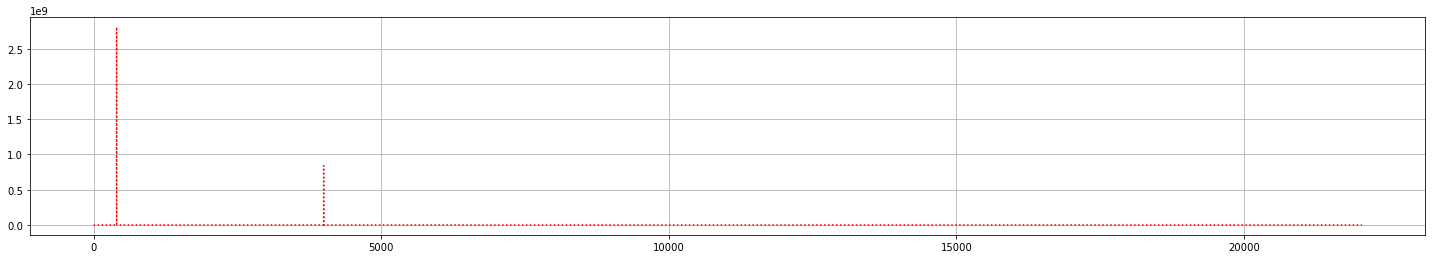

In [121]:
N = SAMPLE_RATE * DURATION

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)
plt.figure(figsize=(25,4))
plt.grid(True)
plt.plot(xf, np.abs(yf), 'r:')
plt.show()

## Filter 4khz

[0.+0.j 0.+0.j 0.+0.j]


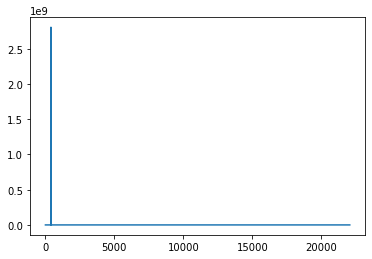

In [125]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)
print(yf[target_idx-1:target_idx+2])
yf[target_idx - 1 : target_idx+2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

## Inverse

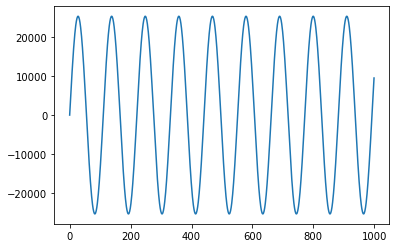

In [126]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

## Save audio 

In [128]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("clean.wav", SAMPLE_RATE, norm_new_sig)

## Ex

In [23]:
from pprint import pp

def s(freq, duration, sampling_rate=10):
  x = np.linspace(0,duration,duration*sampling_rate)
  y = np.sin(freq*(2*np.pi)*x)
  plt.plot(x,y,'bo')
  plt.plot(x,y)
  plt.grid(True)
  plt.show()
    

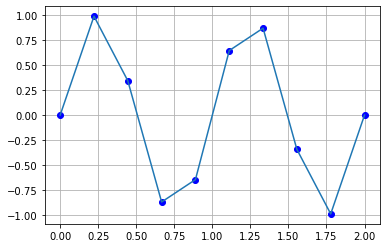

In [31]:
s(1,2,5)

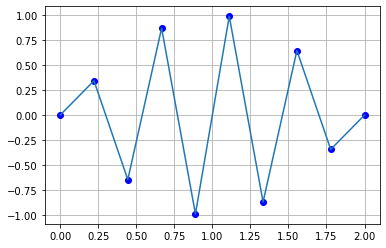

In [32]:
s(2,2,5)

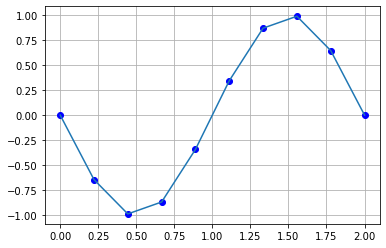

In [33]:
s(4,2,5)